<a href="https://colab.research.google.com/github/diepngocnhiep/Turing-Machine-Learning-Erasmus-2022/blob/main/Notebook_Group_5_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GROUP 5 TURING MACHINE LEARNING FINAL PROJECT:**

# **APPROACHES TO PERFORM DUI PREDICTION BASED ON PERSONAL DATA**



Diep Nhiep, Philip Palim, Arnau Domenech

Below is the complete code with explanation for the project. First of all, we installed the packages that we needed:

In [ ]:
#Import all the stuff
import pandas as pd
import numpy as np
import re
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from google.colab import files
import io
import matplotlib.pyplot as plt

Following is the section for uploading the file, in this case we make use of xlsx file, however, it could work properly with .csv file as well.

In [ ]:
uploaded = files.upload()

Saving Car_Insurance_Claim.csv to Car_Insurance_Claim (3).csv


In [ ]:
A = pd.read_csv(io.BytesIO(uploaded['Car_Insurance_Claim.csv']))
A


,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.629027,1,after 2015,0,1,10238,12000.0,sedan,0,0,0,0
1,16-25,male,majority,0-9y,none,poverty,0.357757,0,before 2015,0,0,10238,16000.0,sedan,0,0,0,1
2,16-25,female,majority,0-9y,high school,working class,0.493146,1,before 2015,0,0,10238,11000.0,sedan,0,0,0,0
3,16-25,male,majority,0-9y,university,working class,0.206013,1,before 2015,0,1,32765,11000.0,sedan,0,0,0,0
4,26-39,male,majority,10-19y,none,working class,0.388366,1,before 2015,0,0,32765,12000.0,sedan,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,0.582787,1,before 2015,0,0,10238,16000.0,sedan,0,0,1,0
9996,26-39,female,majority,10-19y,none,middle class,0.522231,1,after 2015,0,1,32765,NaN,sedan,1,0,0,0
9997,26-39,male,majority,0-9y,high school,middle class,0.470940,1,before 2015,0,1,10238,14000.0,sedan,0,0,0,0
9998,26-39,female,majority,10-19y,high school,poverty,0.364185,0,before 2015,0,1,10238,13000.0,sedan,2,0,1,1


#DATA CLEANING

Changing format and dropping unnecessary or unhelpful variables

In [ ]:

x=0
source = A.dropna(axis = 0, how ='any')
source=source.reset_index(drop = True)
source['DUIB']=0
#print(source)
for idx, row in source.iterrows():
    if row['DUIS']==0:
        source.at[idx,'DUIB']=0
    else:
        x=x+1
        source.at[idx,'DUIB']=1
    
    if row['AGE']=="16-25":
        source.at[idx,'AGE']=0
    elif row['AGE']=='26-39':
        source.at[idx,'AGE']=1
    elif row['AGE']=='40-64':
        source.at[idx,'AGE']=2
    elif row['AGE']=='65+':
        source.at[idx,'AGE']=3
    
    if row['DRIVING_EXPERIENCE']=="0-9y":
        source.at[idx,'DRIVING_EXPERIENCE']=0
    elif row['DRIVING_EXPERIENCE']=='10-19y':
        source.at[idx,'DRIVING_EXPERIENCE']=1
    elif row['DRIVING_EXPERIENCE']=='20-29y':
        source.at[idx,'DRIVING_EXPERIENCE']=2
    elif row['DRIVING_EXPERIENCE']=='30y+':
        source.at[idx,'DRIVING_EXPERIENCE']=3    
        
    if row['EDUCATION']=="none":
        source.at[idx,'EDUCATION']=0
    elif row['EDUCATION']=='high school':
        source.at[idx,'EDUCATION']=1
    elif row['EDUCATION']=='university':
        source.at[idx,'EDUCATION']=2   
        
    if row['INCOME']=="poverty":
     source.at[idx,'INCOME']=0
    elif row['INCOME']=='working class':
     source.at[idx,'INCOME']=1
    elif row['INCOME']=='middle class':
     source.at[idx,'INCOME']=2
    elif row['INCOME']=='upper class':
     source.at[idx,'INCOME']=3    
     
     
    if row['VEHICLE_YEAR']=="before 2015":
      source.at[idx,'VEHICLE_YEAR']=0
    elif row['VEHICLE_YEAR']=='after 2015':
      source.at[idx,'VEHICLE_YEAR']=1
     
    if row['VEHICLE_TYPE']=="sedan":
      source.at[idx,'VEHICLE_TYPE']=0
    elif row['VEHICLE_TYPE']=='sports car':
      source.at[idx,'VEHICLE_TYPE']=1
      
      
    if row['GENDER']=="female":
       source.at[idx,'GENDER']=0
    elif row['GENDER']=='male':
       source.at[idx,'GENDER']=1
       
       
       
    if row['RACE']=="majority":
        source.at[idx,'RACE']=0
    elif row['RACE']=='minority':
        source.at[idx,'RACE']=1
totalY=source['DUIB']
totalX=source.drop(['DUIB', 'DUIS', 'OUTCOME', 'POSTAL_CODE'], axis=1)
totalY.describe()
totalX.describe()


,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,PAST_ACCIDENTS
count,8149.000000,8149.000000,8149.000000,8149.000000,8149.00000,8149.000000,8149.000000
mean,0.516368,0.699227,0.501043,0.689287,11693.45932,1.485581,1.065530
std,0.137684,0.458622,0.500030,0.462814,2822.35147,2.244711,1.665623
min,0.053358,0.000000,0.000000,0.000000,2000.00000,0.000000,0.000000
25%,0.417891,0.000000,0.000000,0.000000,10000.00000,0.000000,0.000000
50%,0.526759,1.000000,1.000000,1.000000,12000.00000,0.000000,0.000000
75%,0.620074,1.000000,1.000000,1.000000,14000.00000,2.000000,2.000000
max,0.960819,1.000000,1.000000,1.000000,22000.00000,22.000000,15.000000


Below is the data correlation matrix with specific number. The positive gave a positive correlation, meanwhile negative outcome represents the negative relation of each two variables:


In [ ]:
source.corr()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME,DUIB
CREDIT_SCORE,1.000000,0.312995,0.282555,0.221354,0.007465,-0.174453,0.208433,0.127888,0.182408,-0.321436,0.137397
VEHICLE_OWNERSHIP,0.312995,1.000000,0.170752,0.116477,-0.010469,-0.093710,0.133302,0.087432,0.121881,-0.386217,0.089536
MARRIED,0.282555,0.170752,1.000000,0.293613,0.010056,-0.465642,0.216213,0.119750,0.214767,-0.253200,0.124593
CHILDREN,0.221354,0.116477,0.293613,1.000000,0.019260,-0.451105,0.224753,0.113996,0.204888,-0.230255,0.118056
POSTAL_CODE,0.007465,-0.010469,0.010056,0.019260,1.000000,-0.130169,0.113228,0.034591,-0.120617,0.095939,0.028800
ANNUAL_MILEAGE,-0.174453,-0.093710,-0.465642,-0.451105,-0.130169,1.000000,-0.318478,-0.113474,-0.195160,0.184865,-0.110431
SPEEDING_VIOLATIONS,0.208433,0.133302,0.216213,0.224753,0.113228,-0.318478,1.000000,0.365700,0.445531,-0.293138,0.346873
DUIS,0.127888,0.087432,0.119750,0.113996,0.034591,-0.113474,0.365700,1.000000,0.264834,-0.190015,0.893787
PAST_ACCIDENTS,0.182408,0.121881,0.214767,0.204888,-0.120617,-0.195160,0.445531,0.264834,1.000000,-0.312738,0.275864
OUTCOME,-0.321436,-0.386217,-0.253200,-0.230255,0.095939,0.184865,-0.293138,-0.190015,-0.312738,1.000000,-0.205789


In [ ]:
totalX.corr()

,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,PAST_ACCIDENTS
CREDIT_SCORE,1.000000,0.312995,0.282555,0.221354,-0.174453,0.208433,0.182408
VEHICLE_OWNERSHIP,0.312995,1.000000,0.170752,0.116477,-0.093710,0.133302,0.121881
MARRIED,0.282555,0.170752,1.000000,0.293613,-0.465642,0.216213,0.214767
CHILDREN,0.221354,0.116477,0.293613,1.000000,-0.451105,0.224753,0.204888
ANNUAL_MILEAGE,-0.174453,-0.093710,-0.465642,-0.451105,1.000000,-0.318478,-0.195160
SPEEDING_VIOLATIONS,0.208433,0.133302,0.216213,0.224753,-0.318478,1.000000,0.445531
PAST_ACCIDENTS,0.182408,0.121881,0.214767,0.204888,-0.195160,0.445531,1.000000


#Decision Tree Creation and Hyperparameters
Here we can change the hyperparameters to optimize our decision tree

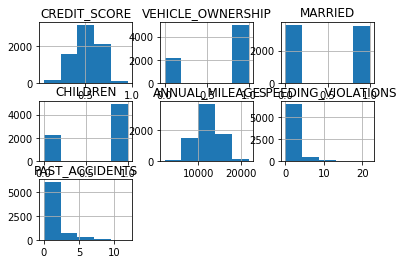

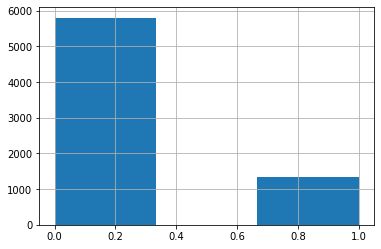

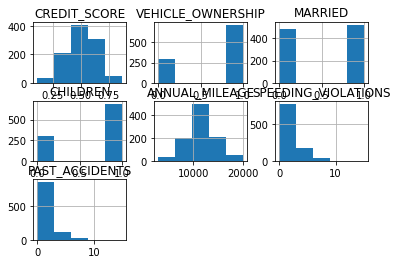

129
('DT accuracy: ', 0.793)


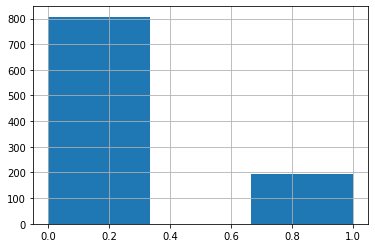

In [ ]:
trainingX=totalX[:7149]
trainingX1=totalX[:6149]
trainingX.hist(bins=5)
plt.show()
trainingY=totalY[:7149]
trainingY1=totalY[:6149]
trainingY.hist(bins=3)
plt.show()
testingX=totalX[7149:]
testingX1=totalX.iloc[6149:7149]
testingX2=totalX[7149:]
testingX.hist(bins=5)
plt.show()
testingY=totalY[7149:]
testingY1=totalY.iloc[6149:7149]
testingY2=totalY[7149:]
testingY.hist(bins=3)

modelDT = tree.DecisionTreeClassifier(max_depth = 10, random_state=1)
modelDT = modelDT.fit(trainingX1, trainingY1)
y_pred1 = modelDT.predict(testingX1)
ypred1=pd.DataFrame(y_pred1)
print(sum(y_pred1))

accuracy = accuracy_score(testingY1, y_pred1)
print(("DT accuracy: ", accuracy))

#Evaluate Decision Tree
Use the final thousand observations to evaluate our model

In [ ]:
modelDTFinal = tree.DecisionTreeClassifier(max_depth = 10, random_state=1)
modelDTFinal = modelDTFinal.fit(trainingX, trainingY)
y_pred2 = modelDT.predict(testingX)
ypred2=pd.DataFrame(y_pred1)
print(sum(y_pred1))

accuracy = accuracy_score(testingY2, y_pred2)
print(("DT accuracy: ", accuracy))

#Advanced Models

#More Splitting of the Data
This part we follow the guidance of the Ensemble Method notebook of the course with split the data set for training, parameter choosing, and predicting:


In [ ]:
from sklearn.model_selection import train_test_split
totalY=source['DUIB']
totalX=source.drop(['DUIB', 'DUIS', 'OUTCOME', 'POSTAL_CODE'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(totalX, totalY, train_size=0.8, stratify=totalY, random_state=3)

In [ ]:
# check how the splitting is done
print(f"Shape X_train: {X_train.shape}")
print(f"Shape X_test: {X_test.shape} \n")

print(f"Shape y_train: {y_train.shape}")
print(f"Num 0: {sum(y_train == 0)} ({round(100*sum(y_train==0)/y_train.shape[0],2)}%)") 
print(f"Num 1: {sum(y_train == 1)} ({round(100*sum(y_train==1)/y_train.shape[0],2)}%) \n")

print(f"Shape y_test: {y_test.shape}")
print(f"Num 0: {sum(y_test == 0)} ({round(100*sum(y_test==0)/y_test.shape[0],2)}%)") 
print(f"Num 1: {sum(y_test == 1)} ({round(100*sum(y_test==1)/y_test.shape[0],2)}%)")

Shape X_train: (6519, 15)
Shape X_test: (1630, 15) 

Shape y_train: (6519,)
Num 0: 5285 (81.07%)
Num 1: 1234 (18.93%) 

Shape y_test: (1630,)
Num 0: 1321 (81.04%)
Num 1: 309 (18.96%)


#Random Forest

Following is just to check how it would print the default parameters. We will change this by choosing the optimal parameter set:

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
rf_model = RFC(random_state=9)
from pprint import pprint
print('Parameters currently in use:\n')
pprint(rf_model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 9,
 'verbose': 0,
 'warm_start': False}


This is the part we would make use of GridSearch to choose the optimal parameter set:

In [ ]:
from sklearn.model_selection import GridSearchCV

rf_parameters = {'n_estimators': [50, 100, 200, 500],
              'max_features': [4,5,10,15],
              'max_depth': [10, 15, 20, 25],
              'min_samples_leaf': [5, 10, 15]}

# create the cross-validation object
optimal_params_rf = GridSearchCV(
    estimator = RFC(random_state=22),  
    param_grid = rf_parameters,                               
    cv = 5,                                                  
    scoring= 'accuracy',
    verbose = 0                                       
)

This is the fit function to train the data and compare to see which parameter set works best. This took quite a long time, for 5 times running, each took 20 minutes to complete.

In [ ]:
optimal_params_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=22),
             param_grid={'max_depth': [10, 15, 20, 25],
                         'max_features': [4, 5, 10, 15],
                         'min_samples_leaf': [5, 10, 15],
                         'n_estimators': [50, 100, 200, 500]},
             scoring='accuracy')

In [ ]:
optimal_params_rf.best_params_

{'max_depth': 15,
 'max_features': 4,
 'min_samples_leaf': 15,
 'n_estimators': 50}

In [ ]:
optimal_params_rf.best_score_


0.8139280989128439

Below we perform the method with the optimal parameter set chosen above:

In [ ]:
rf_best_model = RFC(n_estimators=optimal_params_rf.best_params_['n_estimators'], max_depth=optimal_params_rf.best_params_['max_depth'],
                    max_features=optimal_params_rf.best_params_['max_features'], min_samples_leaf=optimal_params_rf.best_params_['min_samples_leaf'], random_state=22)
rf_best_model = rf_best_model.fit(X_train, y_train)

rf_pred = rf_best_model.predict(X_test)

from sklearn.metrics import accuracy_score
rf_accuracy = accuracy_score(y_test, rf_pred)
print(rf_accuracy)
print(sum(rf_pred))

0.8104294478527607
76


The accuracy above look like the best but the recall rate is not a good idea. Hence, we process to choose the more balancing parameter choice, which gave quite good accuracy and good recall rate:


In [ ]:
rf = RFC(n_estimators=200, oob_score=True, random_state=22, max_features = 3, max_depth = 15)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, max_features=3, n_estimators=200,
                       oob_score=True, random_state=22)

In [ ]:
from sklearn.metrics import accuracy_score
predicted = rf.predict(X_test)
accuracyRF = accuracy_score(y_test, predicted)
print("RF accuracy:", accuracyRF)
print(sum(predicted))

RF accuracy: 0.8049079754601227
119


#ADA Boost

In this case, we inheirted the idea of traditional ADA, together with the Seminar for Business Analysis major recently (our studies about the ADA implementation), hence we make use of that research and perform that on this data set. The main idea is to use the parameters of Decision Tree (the best of DT) to apply for the argument of ADA. There is paper of professor in Erasmus (Akyuz 2021) to prove this optimality and efficiency of new ADABoost (using DT implementation):

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ADA = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8),
                             algorithm='SAMME',
                             random_state=1)
ADA_fit = ADA.fit(trainingX, trainingY)
ADA_pred = ADA_fit.predict(testingX)

In [ ]:
predicted = ADA.predict(testingX)
accuracyADA = accuracy_score(testingY, predicted)
print('Accuracy of ADA: ', accuracyADA)
print(sum(predicted))

Accuracy of ADA:  0.78
127
